##### A sandbox notebook where I answer some questions Pete Turner had about compilation and run times.
The first of these plots also features in the supplimental information

In [1]:
import numpy as np
import interferometer as itf
from matplotlib import pyplot as plt
from Aquinas.numeric_truncated_unitaries import *
from Aquinas.direct_decomposition import *
from Aquinas.boson_sampling_probabilities import *
from Aquinas.simulation import *
# from qiskit.quantum_info import Operator
import time

In [ ]:
"""
A function to get the compile times of a "circuit decomposition" (i.e. the process of going from an interferometer to a quantum circuit) Here, compile times are broken up into two subroutines. time_exp is the amount of time it takes to calculate the truncated unitary for k photons. time_decomp is the amount of time it takes to synthesise the truncated unitary into a quantum circuit.
"""
def timed_circuit_decomposition(U, k):
    """
    U: m * m unitary matrix representing an m mode interferometer
    k: Maximum number of photons that are expected at any given time
    """
    m = U.shape[0]
    circuits = []
    I = itf.square_decomposition(U) # type(I) == Interferometer
    time_exp = 0.0
    time_decomp = 0.0
    for BS in I.BS_list:
        U_BS = BS_unitary(BS.theta, BS.phi)

        # Subroutine (i) -- Calculate matrix exponential
        start_exp = time.time()
        U_trunc = numeric_truncated_unitary(U_BS, k, reverse_qubit_order=True)
        end_exp = time.time()
        time_exp += end_exp - start_exp

        # Subroutine (ii) -- Circuit compilation
        start_decomp = time.time()
        circuits.append(compile_unitary(U_trunc)) # Compile individual unitaries into quantum circuits
        end_decomp = time .time()
        time_decomp += end_decomp - start_decomp

    # interferometer_circuit = knit_qiskit_circuits(m, I.BS_list, circuits)
    print("         Exponentiation time: ", time_exp, "s")
    print("         Circuit decomposition time: ", time_decomp, "s")

    return time_exp, time_decomp

### Plot circuit compilation times for two mode interferometers (beamsplitters)

In [3]:
modes = [2]
photons = [1,2,4,8,16]
calc_times = [[] for m in modes]

for idx, m in enumerate(modes):
    print(f"Running m = {m}")
    for n in photons:
        print(f"    Running n = {n}")
        U = random_unitary(m)
        time_exp, time_decomp = timed_circuit_decomposition(U, n)
        calc_times[idx].append((time_exp, time_decomp))

print("\n",calc_times)

Running m = 2
    Running n = 1
         Exponentiation time:  0.0050351619720458984 s
         Circuit decomposition time:  0.013979673385620117 s
    Running n = 2
         Exponentiation time:  0.002472400665283203 s
         Circuit decomposition time:  0.23067259788513184 s
    Running n = 4
         Exponentiation time:  0.004387855529785156 s
         Circuit decomposition time:  5.041921377182007 s
    Running n = 8
         Exponentiation time:  0.15712404251098633 s
         Circuit decomposition time:  114.50093793869019 s
    Running n = 16
         Exponentiation time:  1.9037115573883057 s
         Circuit decomposition time:  2539.274013519287 s

 [[(0.0050351619720458984, 0.013979673385620117), (0.002472400665283203, 0.23067259788513184), (0.004387855529785156, 5.041921377182007), (0.15712404251098633, 114.50093793869019), (1.9037115573883057, 2539.274013519287)]]


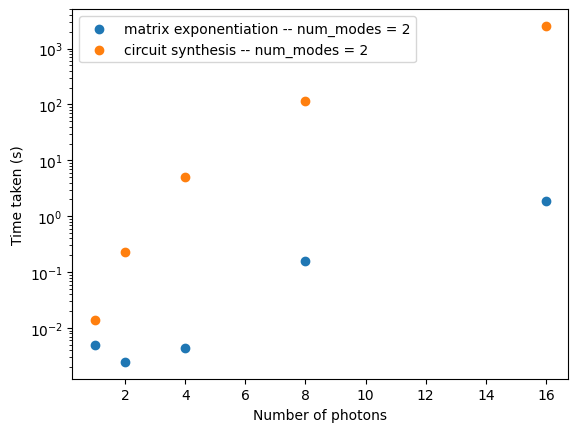

In [4]:
for idx, m in enumerate(modes):
    exp_times = [t[0] for t in calc_times[idx]]
    decomp_times = [t[1] for t in calc_times[idx]]
    plt.scatter(photons, exp_times, label= f"matrix exponentiation -- num_modes = {m}")
    plt.scatter(photons, decomp_times, label= f"circuit synthesis -- num_modes = {m}")
    plt.legend()

plt.yscale("log")
plt.xlabel("Number of photons")
plt.ylabel("Time taken (s)")
plt.show()

### Modes vs photon number:

In [4]:
modes = [2,3,4,5,6,7,8,9,10]
photons = [3]
calc_times = [[] for m in modes]

for idx, m in enumerate(modes):
    print(f"Running m = {m}")
    for n in photons:
        print(f"    Running n = {n}")
        U = random_unitary(m)
        time_exp, time_decomp = timed_circuit_decomposition(U, n)
        calc_times[idx].append((time_exp, time_decomp))

print("\n",calc_times)

Running m = 2
    Running n = 3
         Exponentiation time:  0.012554645538330078 s
         Circuit decomposition time:  0.20684099197387695 s
Running m = 3
    Running n = 3
         Exponentiation time:  0.0056760311126708984 s
         Circuit decomposition time:  0.4363367557525635 s
Running m = 4
    Running n = 3
         Exponentiation time:  0.011234283447265625 s
         Circuit decomposition time:  1.0454871654510498 s
Running m = 5
    Running n = 3
         Exponentiation time:  0.022811412811279297 s
         Circuit decomposition time:  1.6406326293945312 s
Running m = 6
    Running n = 3
         Exponentiation time:  0.02609395980834961 s
         Circuit decomposition time:  2.3604516983032227 s
Running m = 7
    Running n = 3
         Exponentiation time:  0.043396949768066406 s
         Circuit decomposition time:  3.2454357147216797 s
Running m = 8
    Running n = 3
         Exponentiation time:  0.07863330841064453 s
         Circuit decomposition time:  4.8727

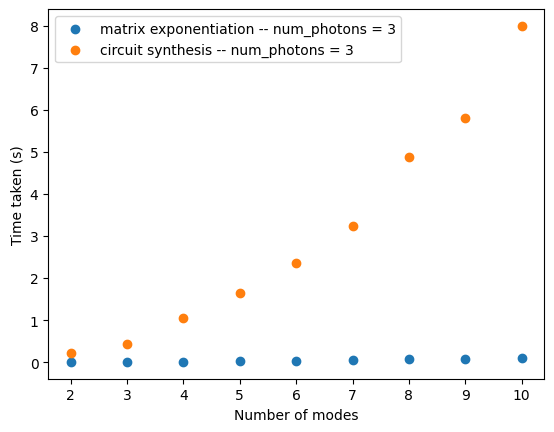

In [15]:
exp_times = [t[0][0] for t in calc_times]
decomp_times = [t[0][1] for t in calc_times]

# for idx, m in enumerate(modes):
#     exp_times = [t[0] for t in calc_times[idx]]
#     decomp_times = [t[1] for t in calc_times[idx]]
#     print(exp_times)
    # plt.scatter(modes, exp_times, label= f"matrix exponentiation -- num_modes = {m}")
    # plt.scatter(modes, decomp_times, label= f"circuit synthesis -- num_modes = {m}")
    # plt.legend()

plt.scatter(modes, exp_times, label=f"matrix exponentiation -- num_photons = 3")
plt.scatter(modes, decomp_times, label=f"circuit synthesis -- num_photons = 3")
plt.legend()
plt.xlabel("Number of modes")
plt.ylabel("Time taken (s)")
plt.show()